In [3]:
import sys
sys.path.append('../')
from src import ht2

In [12]:
import random

def random_augment_textlines(img):
    """random augment textline images
    step1: positional transforms:
        * random rotate
        * random pan
        * random squeeze
        * random smear
    step2: noises:
        * gaussian noise
        * salt and pepper noise
        * advanced salt and pepper noise
    textures (random trigger after each step):
        * blurs
        * down sample
        * jpg compression
        * binarize


    Args:
        img (_type_): input img

    Returns:
        _type_: _description_
    """
    # resize to 64 height
    img = cv2.resize(img,(int(img.shape[1]/img.shape[0]*64),64))
    # positional transforms
    if random.random()<0.5:
        img = ht2.rotate_img(img,angle=random.randint(-3,3),pad_color="WHITE")
    if random.random()<0.1:
        img = ht2.random_pan(img,color=255,h_pad=32,w_pad=100,crop=False)
    if random.random()<0.5:
        img = ht2.squeeze_image(img, squeeze_rate=3**random.uniform(-1,1))
    if random.random()<0.2:
        img = ht2.random_smear(img,n_time_factor=1)
    # noises
    if random.random()<0.5:
        img = ht2.additive_gaussian_noise(img, mean=0, var=10**random.uniform(-2,-1))
    if random.random()<0.1:
        img = ht2.salt_pepper_noise(img, s_vs_p=0.5, freq=10**random.uniform(-3,-2))
    if random.random()<0.1:
        img = ht2.advanced_salt_pepper(img,size=10)
    
    # textures
    if random.random()<0.5:
        img = ht2.blur_image(img,blur_type=random.choice(["gaussian","median","bilateral","box"]),intensity=random.choice([3,5]))
    if random.random()<0.5:
        img = ht2.down_sample(img,down_sample_rate=3**random.uniform(-1,0.5),nearest=False)
    if random.random()<0.1:
        img = ht2.binarize_img(img,mode=random.choice(["threshold","otsu","sauvola"]),thresh=random.randint(0,255))
    if random.random()<0.5:
        img = ht2.jpg_artifact(img, quality=random.randint(30,80))
    if len(img.shape) == 2:
        cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    else:
        img = cv2.cvtColor(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),cv2.COLOR_GRAY2BGR)
    return img    
    


In [14]:
from os.path import join
from glob import glob
import cv2
import random
from time import time

img_root = "/data/parseq3/parseq_dataset/eng_char_gen_1_2899/"
img_paths = glob(join(img_root,"*.jpg"))

# print(img_paths[0])
t = time()
for img_path in img_paths[:100]:
    img = cv2.imread(img_path)
    h,w = img.shape[:2]
    img = cv2.resize(img,(int(w/h*64),64))
    h,w = img.shape[:2]
    # ht2.show_img_np(img)
    
    img = random_augment_textlines(img)
    # ht2.show_img_np(img)

print(time()-t)



    
    
    

    



42.04478669166565


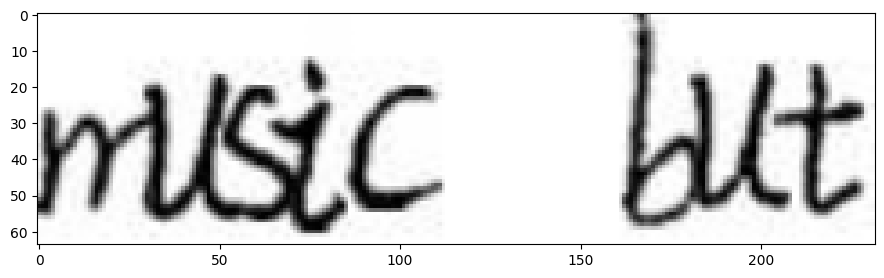

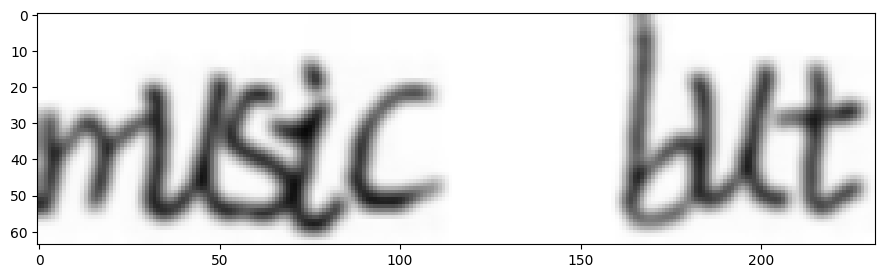

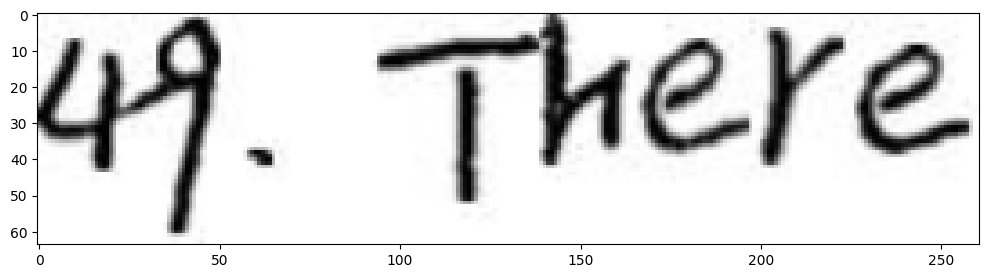

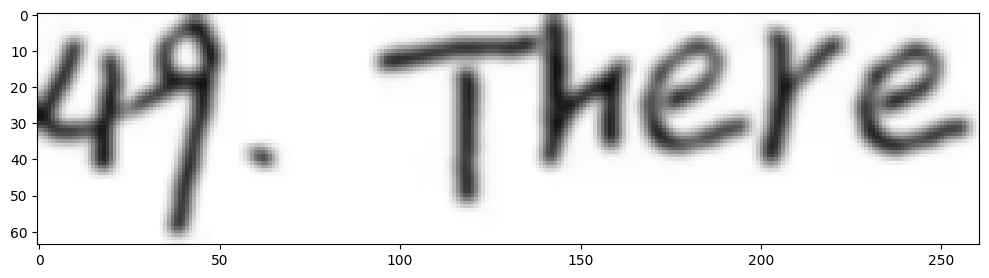

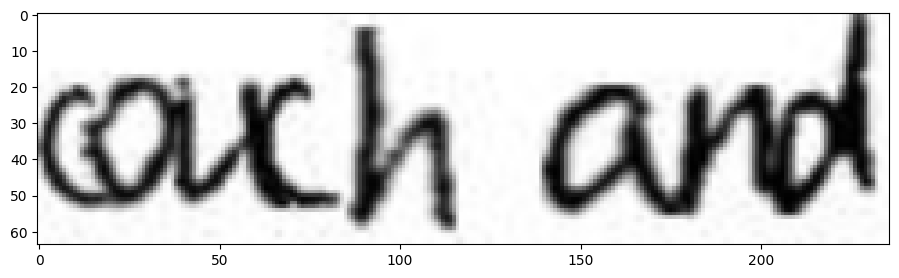

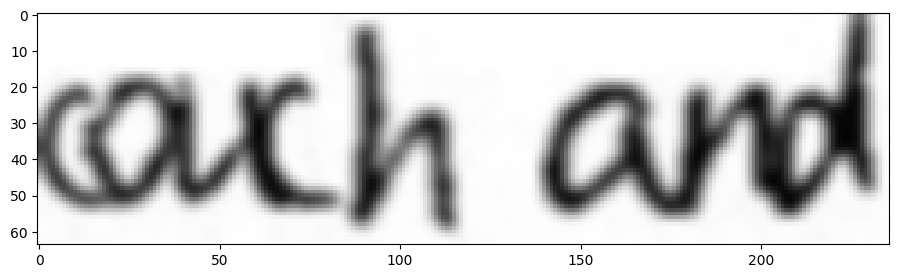

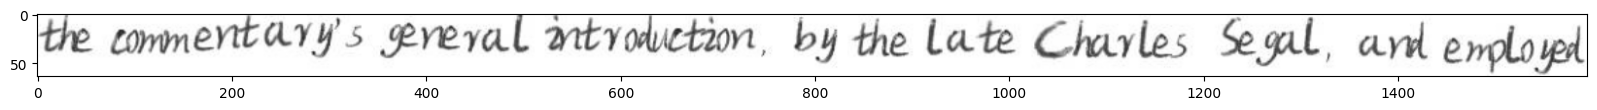

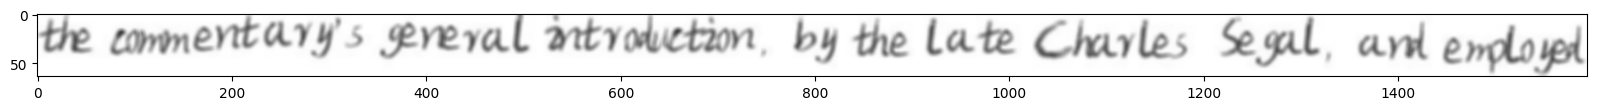

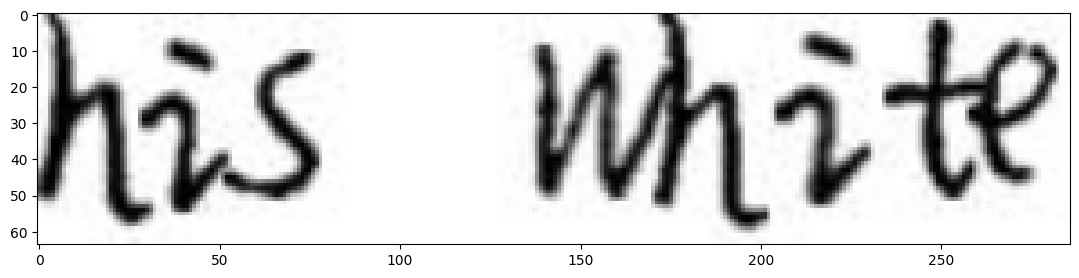

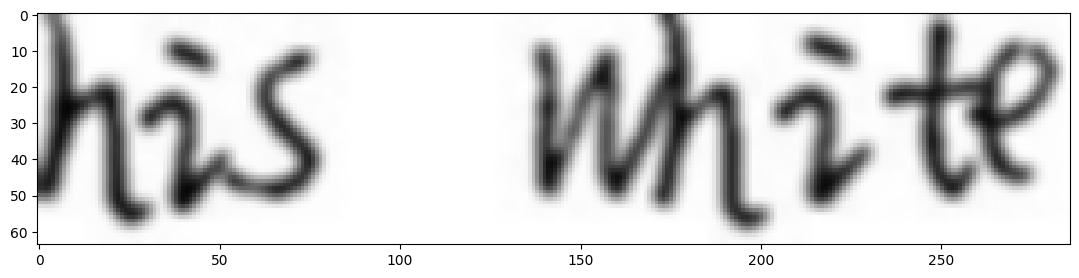

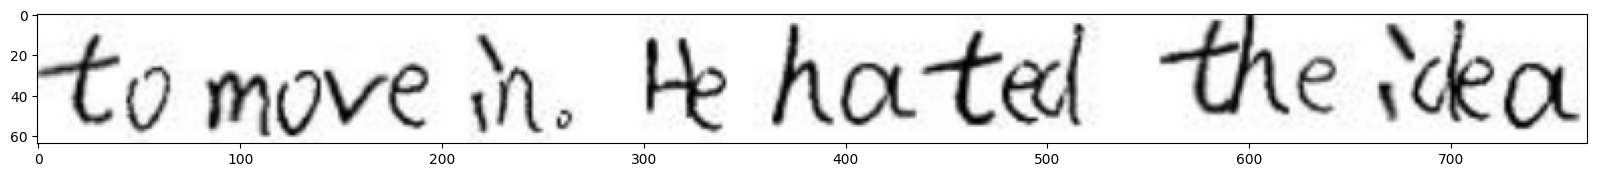

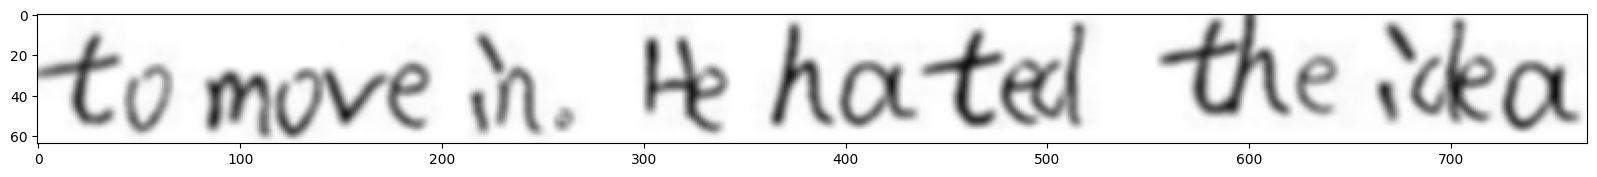

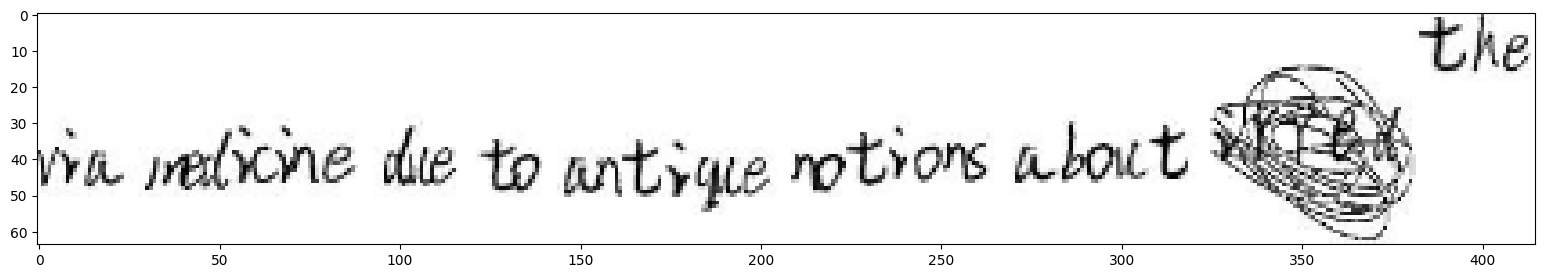

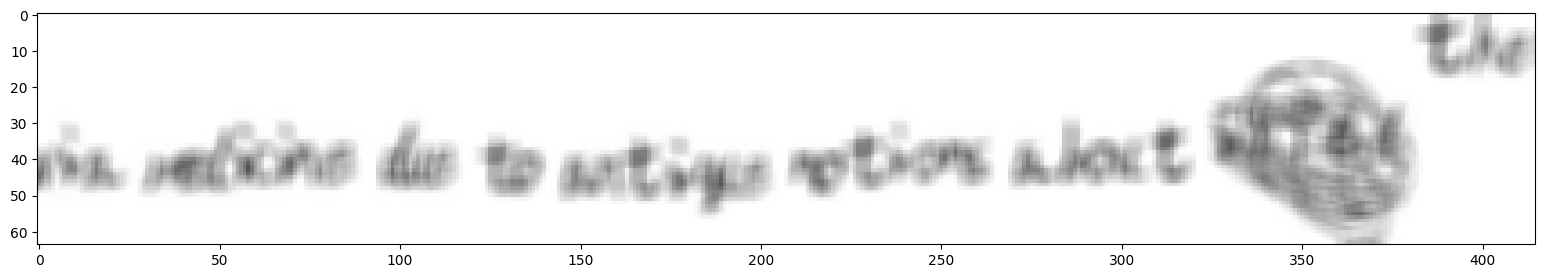

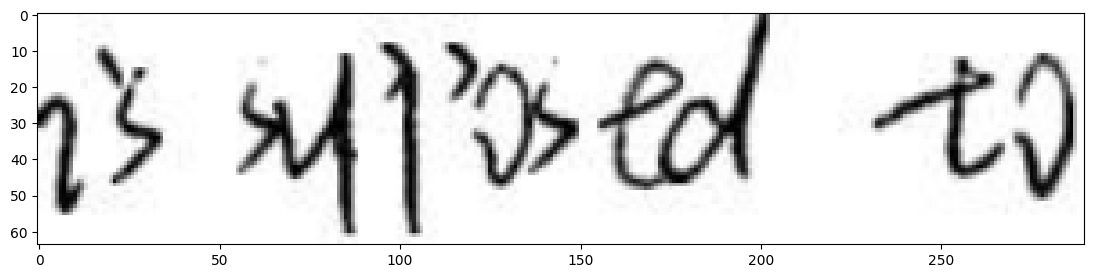

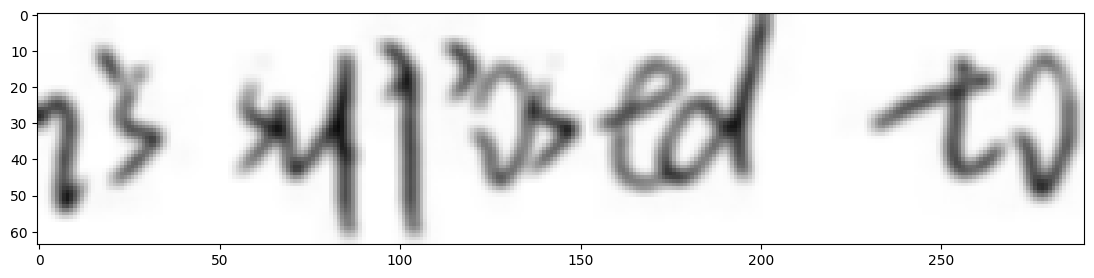

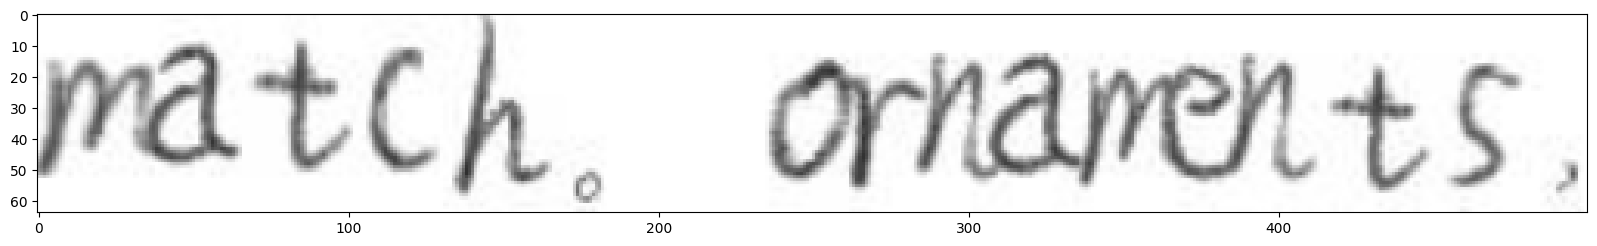

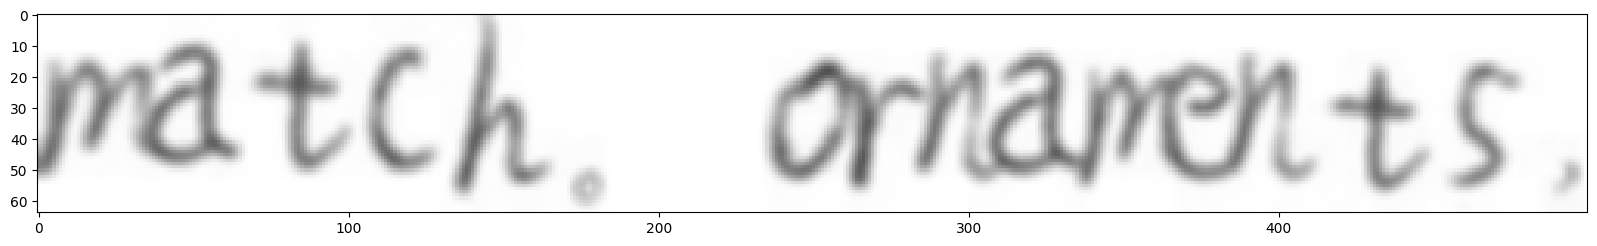

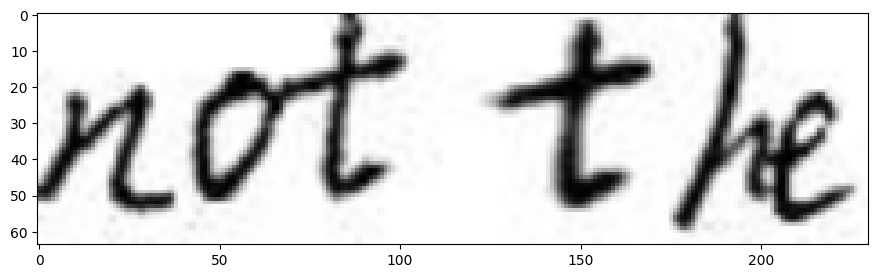

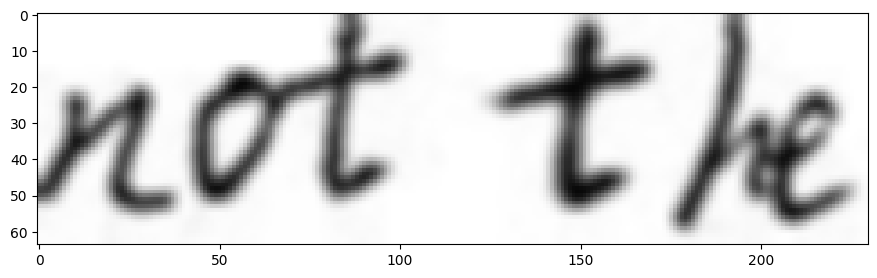

In [16]:
from os.path import join
from glob import glob
import cv2
import random
from time import time

img_root = "/data/parseq3/parseq_dataset/eng_char_gen_1_2899/"
img_paths = glob(join(img_root,"*.jpg"))

# print(img_paths[0])
for img_path in img_paths[:10]:
    img = cv2.imread(img_path)
    h,w = img.shape[:2]
    img = cv2.resize(img,(int(w/h*64),64))
    h,w = img.shape[:2]
    ht2.show_img_np(img)
    
    # img_jpg = ht2.jpg_artifact(img,40)
    # ht2.show_img_np(img_jpg)
    
    # img_smear = random_smear(img)
    # ht2.show_img_np(img_smear)

    # img_rotated = rotate_img(img, angle=3, pad_color=[255,255,255])
    # ht2.show_img_np(img_rotated)

    # img_pan = random_pan(img,color=255,h_pad=100,w_pad=100,crop=False)
    # ht2.show_img_np(img_pan)

    # img_bin = binarize_img(img,mode="otsu",thresh=128)
    # ht2.show_img_np(img_bin)

    # img_asp = ht2.advanced_salt_pepper(img,size=10)
    # img_jpg = ht2.jpg_artifact(img_asp,40)
    # ht2.show_img_np(img_jpg)

    # img_ps = ht2.additive_gaussian_noise(img, mean=0, var=0.1)
    # img_ps = cv2.cvtColor(cv2.cvtColor(img_ps,cv2.COLOR_BGR2GRAY),cv2.COLOR_GRAY2BGR)
    # ht2.show_img_np(img_ps)

    # img = down_sample(img,down_sample_rate=0.7,nearest=True)
    # ht2.show_img_np(img)

    # img = random_squeeze(img, squeeze_rate=3)
    # ht2.show_img_np(img)

    
    img = blur_image(img, blur_type="box", intensity=5)
    ht2.show_img_np(img)



    
    
    

    

